In [1]:
import numpy as np

import qiskit as qk

import tools as t

from qiskit.circuit.library import MCMT

from copy import deepcopy

import matplotlib.pyplot as plt

In [2]:
def histo(dic, normalize=False):
    new_dic = {}
    total_shots = np.sum(t.bit_array(dic))

    for key, value in dic.items():
        new_dic[key] = value / total_shots
    print(dic)
    h = t.plot_weights(new_dic)
    plt.show()
    return

In [3]:
A = np.array([[-0.2776-0.5307j, -0.1057+0.7938j],
              [-0.1057-0.7938j,  0.2776-0.5307j]])

B = np.array([[ 1.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j],
              [ 0.        +0.j, -0.5       +0.j,  0.70710678+0.j,  0.5       +0.j],
              [ 0.        +0.j,  0.5       +0.j,  0.70710678+0.j, -0.5       +0.j],
              [ 0.        +0.j, -0.70710678+0.j,  0.        +0.j, -0.70710678+0.j]])

assert(t.isunitary(A))
assert(t.isunitary(B))

In [4]:
# build circuit
# the goal for now is to go from |000> to |000> by applying trans and inverse transf

qr = qk.QuantumRegister(3, 'q')
qc = qk.QuantumCircuit(qr)

qc.unitary(t.Operator(A), qr[0], label='A')
qc.unitary(t.Operator(B), qr[1:3][::-1], label='B')

qc.cnot(0, 1)
qc.h(0)
qc.h(0)
qc.cnot(0, 1)

qc.unitary(t.Operator(A.conj().T), qr[0], label='A_dag')
qc.unitary(t.Operator(B.conj().T), qr[1:3][::-1], label='B_dag')

qc.measure_all()

print(qc.draw())

print(t.counts(qc))

        ┌───┐      ┌───┐┌───┐     ┌───────┐  ░ ┌─┐      
   q_0: ┤ A ├───■──┤ H ├┤ H ├──■──┤ A_dag ├──░─┤M├──────
        ├───┴┐┌─┴─┐└───┘└───┘┌─┴─┐├───────┴┐ ░ └╥┘┌─┐   
   q_1: ┤1   ├┤ X ├──────────┤ X ├┤1       ├─░──╫─┤M├───
        │  B │└───┘          └───┘│  B_dag │ ░  ║ └╥┘┌─┐
   q_2: ┤0   ├────────────────────┤0       ├─░──╫──╫─┤M├
        └────┘                    └────────┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════════════════╩══╩══╩═
                                                0  1  2 
{'000': 8192}


In [5]:
qr = qk.QuantumRegister(3, 'q')
qc = qk.QuantumCircuit(qr)

qc.x(qr[:3])
qc.h(2)
qc.ccx(qr[0], qr[1], qr[2])
qc.h(2)
qc.x(qr[:3])

print(qc.draw())

     ┌───┐          ┌───┐     
q_0: ┤ X ├───────■──┤ X ├─────
     ├───┤       │  ├───┤     
q_1: ┤ X ├───────■──┤ X ├─────
     ├───┤┌───┐┌─┴─┐├───┤┌───┐
q_2: ┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘


In [6]:
# build A gate

qr = qk.QuantumRegister(3, 'q')
A_gate = qk.QuantumCircuit(qr)

A_gate.unitary(t.Operator(A), qr[0], label='A')
A_gate.unitary(t.Operator(B), qr[1:3][::-1], label='B')

A_gate.cnot(0, 1)
A_gate.h(0)

print(A_gate.draw())

     ┌───┐      ┌───┐
q_0: ┤ A ├───■──┤ H ├
     ├───┴┐┌─┴─┐└───┘
q_1: ┤1   ├┤ X ├─────
     │  B │└───┘     
q_2: ┤0   ├──────────
     └────┘          


In [7]:
# test A gate

qr = qk.QuantumRegister(3, 'q')
qc = qk.QuantumCircuit(qr)

qc.compose(A_gate, qr, inplace=True)
qc.measure_all()

print(qc.draw())

print(t.counts(qc))

        ┌───┐      ┌───┐ ░ ┌─┐      
   q_0: ┤ A ├───■──┤ H ├─░─┤M├──────
        ├───┴┐┌─┴─┐└───┘ ░ └╥┘┌─┐   
   q_1: ┤1   ├┤ X ├──────░──╫─┤M├───
        │  B │└───┘      ░  ║ └╥┘┌─┐
   q_2: ┤0   ├───────────░──╫──╫─┤M├
        └────┘           ░  ║  ║ └╥┘
meas: 3/════════════════════╩══╩══╩═
                            0  1  2 
{'000': 1424, '010': 2645, '100': 1467, '110': 2656}


In [8]:
# build A_dag gate

qr = qk.QuantumRegister(3, 'q')
Adag_gate = qk.QuantumCircuit(qr)

Adag_gate.h(0)
Adag_gate.cnot(0, 1)

Adag_gate.unitary(t.Operator(A.conj().T), qr[0], label='A_dag')
Adag_gate.unitary(t.Operator(B.conj().T), qr[1:3][::-1], label='B_dag')

print(Adag_gate.draw())

     ┌───┐     ┌───────┐ 
q_0: ┤ H ├──■──┤ A_dag ├─
     └───┘┌─┴─┐├───────┴┐
q_1: ─────┤ X ├┤1       ├
          └───┘│  B_dag │
q_2: ──────────┤0       ├
               └────────┘


In [9]:
# build Sx gate

qr = qk.QuantumRegister(4, 'q')
Sx_gate = qk.QuantumCircuit(qr)

Sx_gate.x(2)
Sx_gate.compose(MCMT('cx', 3, 1), qr, inplace=True)
Sx_gate.x(2)

print(Sx_gate.draw())


                    
q_0: ───────■───────
            │       
q_1: ───────■───────
     ┌───┐  │  ┌───┐
q_2: ┤ X ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_3: ─────┤ X ├─────
          └───┘     


In [10]:
# build S0 gate

qr = qk.QuantumRegister(3, 'q')
S0_gate = qk.QuantumCircuit(qr)

S0_gate.x(qr[:3])
S0_gate.h(2)
S0_gate.ccx(qr[0], qr[1], qr[2])
S0_gate.h(2)
S0_gate.x(qr[:3])

print(S0_gate.draw())

     ┌───┐          ┌───┐     
q_0: ┤ X ├───────■──┤ X ├─────
     ├───┤       │  ├───┤     
q_1: ┤ X ├───────■──┤ X ├─────
     ├───┤┌───┐┌─┴─┐├───┤┌───┐
q_2: ┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘


In [11]:
# build Q operator

qr = qk.QuantumRegister(4, 'q')
Q_gate = qk.QuantumCircuit(qr)

Q_gate.compose(Sx_gate, qr, inplace=True)
Q_gate.barrier()
Q_gate.compose(Adag_gate, qr[:-1], inplace=True)
Q_gate.barrier()
Q_gate.compose(S0_gate, qr[:-1], inplace=True)
Q_gate.barrier()
Q_gate.compose(A_gate, qr[:-1], inplace=True)
Q_gate.barrier()


print(Q_gate.draw())

                     ░ ┌───┐     ┌───────┐  ░ ┌───┐          ┌───┐      ░ »
q_0: ───────■────────░─┤ H ├──■──┤ A_dag ├──░─┤ X ├───────■──┤ X ├──────░─»
            │        ░ └───┘┌─┴─┐├───────┴┐ ░ ├───┤       │  ├───┤      ░ »
q_1: ───────■────────░──────┤ X ├┤1       ├─░─┤ X ├───────■──┤ X ├──────░─»
     ┌───┐  │  ┌───┐ ░      └───┘│  B_dag │ ░ ├───┤┌───┐┌─┴─┐├───┤┌───┐ ░ »
q_2: ┤ X ├──■──┤ X ├─░───────────┤0       ├─░─┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├─░─»
     └───┘┌─┴─┐└───┘ ░           └────────┘ ░ └───┘└───┘└───┘└───┘└───┘ ░ »
q_3: ─────┤ X ├──────░──────────────────────░───────────────────────────░─»
          └───┘      ░                      ░                           ░ »
«     ┌───┐      ┌───┐ ░ 
«q_0: ┤ A ├───■──┤ H ├─░─
«     ├───┴┐┌─┴─┐└───┘ ░ 
«q_1: ┤1   ├┤ X ├──────░─
«     │  B │└───┘      ░ 
«q_2: ┤0   ├───────────░─
«     └────┘           ░ 
«q_3: ─────────────────░─
«                      ░ 


iter  1
{'010': 210, '000': 124, '110': 7748, '100': 110}


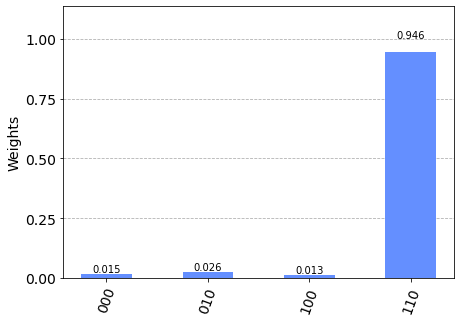

iter  2
{'110': 161, '100': 2140, '010': 3716, '000': 2175}


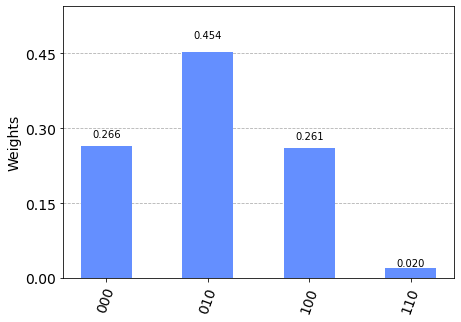

iter  3
{'000': 482, '010': 920, '110': 6296, '100': 494}


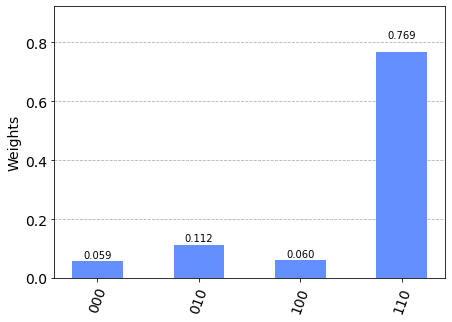

iter  4
{'100': 907, '000': 847, '010': 1688, '110': 4750}


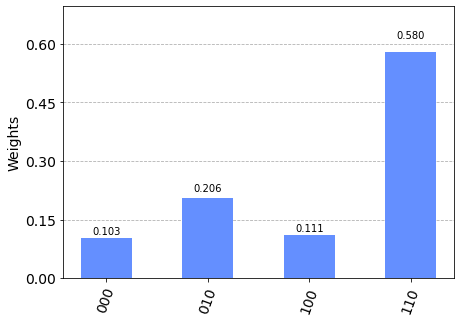

iter  5
{'110': 895, '100': 1904, '000': 1900, '010': 3493}


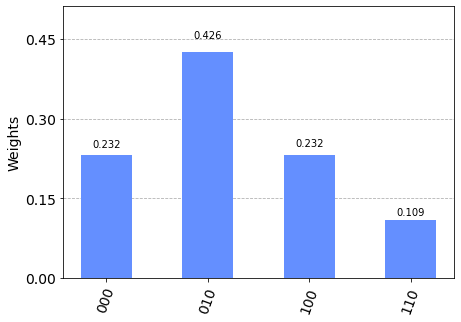

iter  6
{'100': 1, '111': 1, '110': 8184, '000': 2, '010': 4}


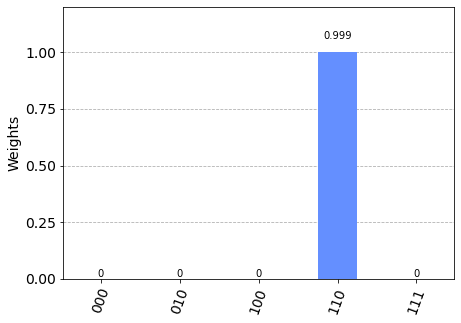

iter  7
{'000': 1837, '010': 3236, '100': 1904, '110': 1215}


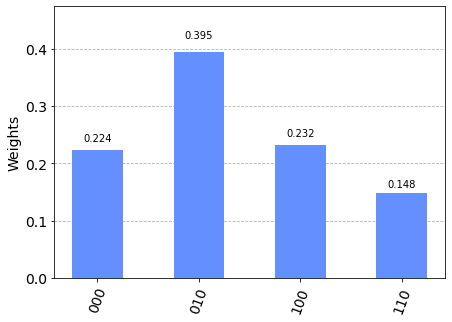

iter  8
{'111': 1, '100': 1106, '110': 4245, '000': 1055, '010': 1785}


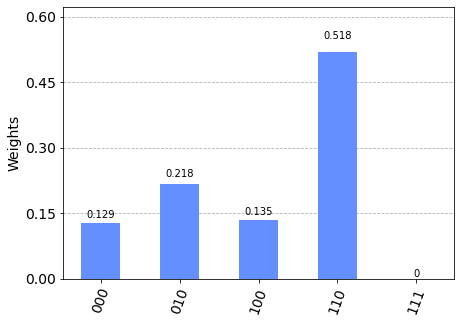

iter  9
{'111': 1, '100': 377, '110': 6619, '010': 747, '000': 448}


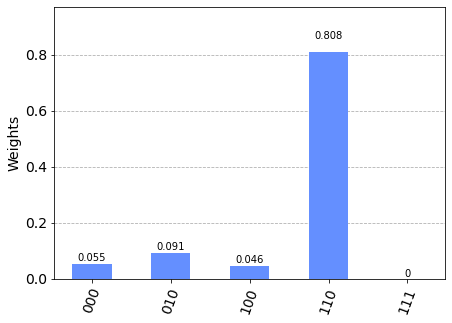

iter  10
{'111': 1, '110': 51, '100': 2217, '010': 3749, '000': 2174}


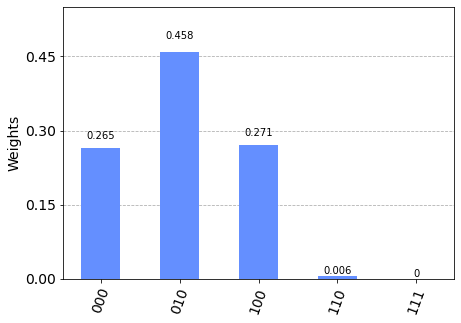

In [13]:
# test

max_iter = 10

qr = qk.QuantumRegister(4, 'q')
cr = qk.ClassicalRegister(3, 'c')
qc = qk.QuantumCircuit(qr, cr)

qc.compose(A_gate, qr[:-1], inplace=True)
qc.x(qr[-1])
qc.h(qr[-1])

qc.barrier()

for i in range(1, max_iter+1):
    qc0 = deepcopy(qc)
    for j in range(i):
        qc0.compose(Q_gate, qr, inplace=True)

    qc0.measure(qr[:-1], cr)

#     print(qc0.draw())
    # i want the state |001>
    print('iter ', i)
    counts = t.counts(qc0)
#     print(i, 'iter', counts)
    histo(counts)